In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Machine Learning and Models & Training
The supervised machine learning models (classification) considered to train the dataset in this notebook are:

Decision Tree
Random Forest
Multilayer Perceptrons
XGBoost
Autoencoder Neural Network
Support Vector Machines


In [49]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [8]:
data0 = pd.read_csv("urldata.csv")
data0.head()

,has_ip_address,length,checkAtSign,calc_domain_age,check_shortening,check_for_iframe,check_for_bar_manipulation,check_for_right_click_disabled,forwarding,label
0,0,0,0,0,0,1,1.0,1,1,0
1,0,0,0,0,0,1,1.0,1,1,0
2,0,1,0,0,0,0,0.0,0,0,0
3,0,0,0,0,0,1,1.0,1,1,0
4,0,0,0,0,1,1,1.0,1,1,0


In [9]:
data0.columns

Index(['has_ip_address', 'length', 'checkAtSign', 'calc_domain_age',
       'check_shortening', 'check_for_iframe', 'check_for_bar_manipulation',
       'check_for_right_click_disabled', 'forwarding', 'label'],
      dtype='object')

In [16]:
# Attempt to convert columns to int64
data0 = data0.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 and convert DataFrame to int64
data0 = data0.fillna(0).astype('int64')

# Check the data types again
data0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 0 to 4001
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   has_ip_address                  4002 non-null   int64
 1   length                          4002 non-null   int64
 2   checkAtSign                     4002 non-null   int64
 3   calc_domain_age                 4002 non-null   int64
 4   check_shortening                4002 non-null   int64
 5   check_for_iframe                4002 non-null   int64
 6   check_for_bar_manipulation      4002 non-null   int64
 7   check_for_right_click_disabled  4002 non-null   int64
 8   forwarding                      4002 non-null   int64
 9   label                           4002 non-null   int64
dtypes: int64(10)
memory usage: 312.8 KB


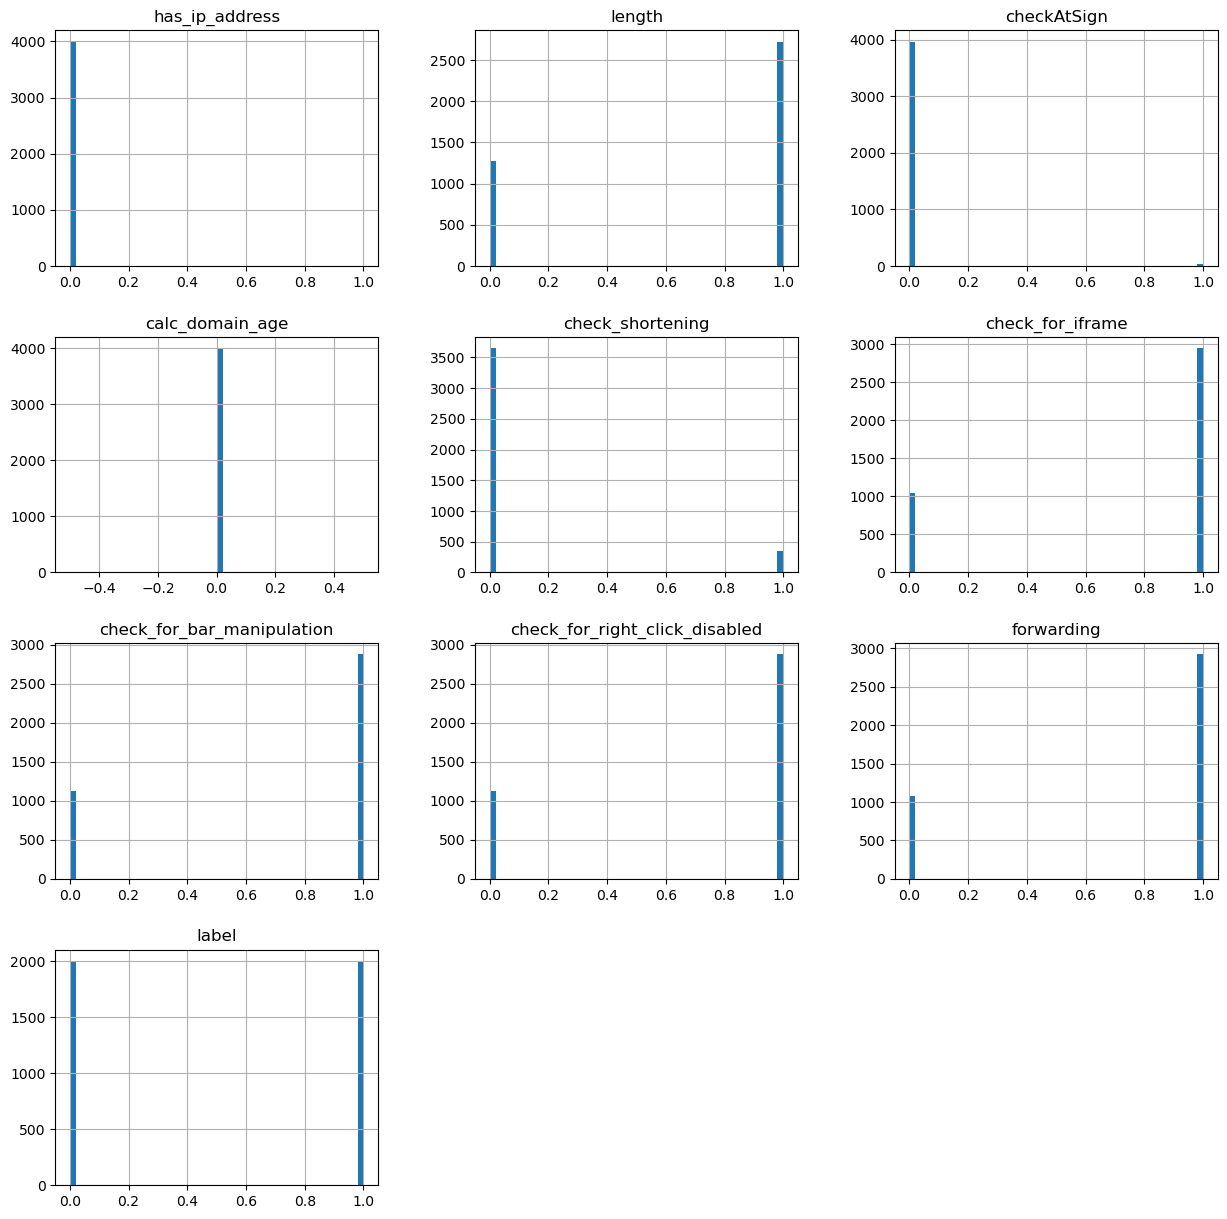

In [17]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

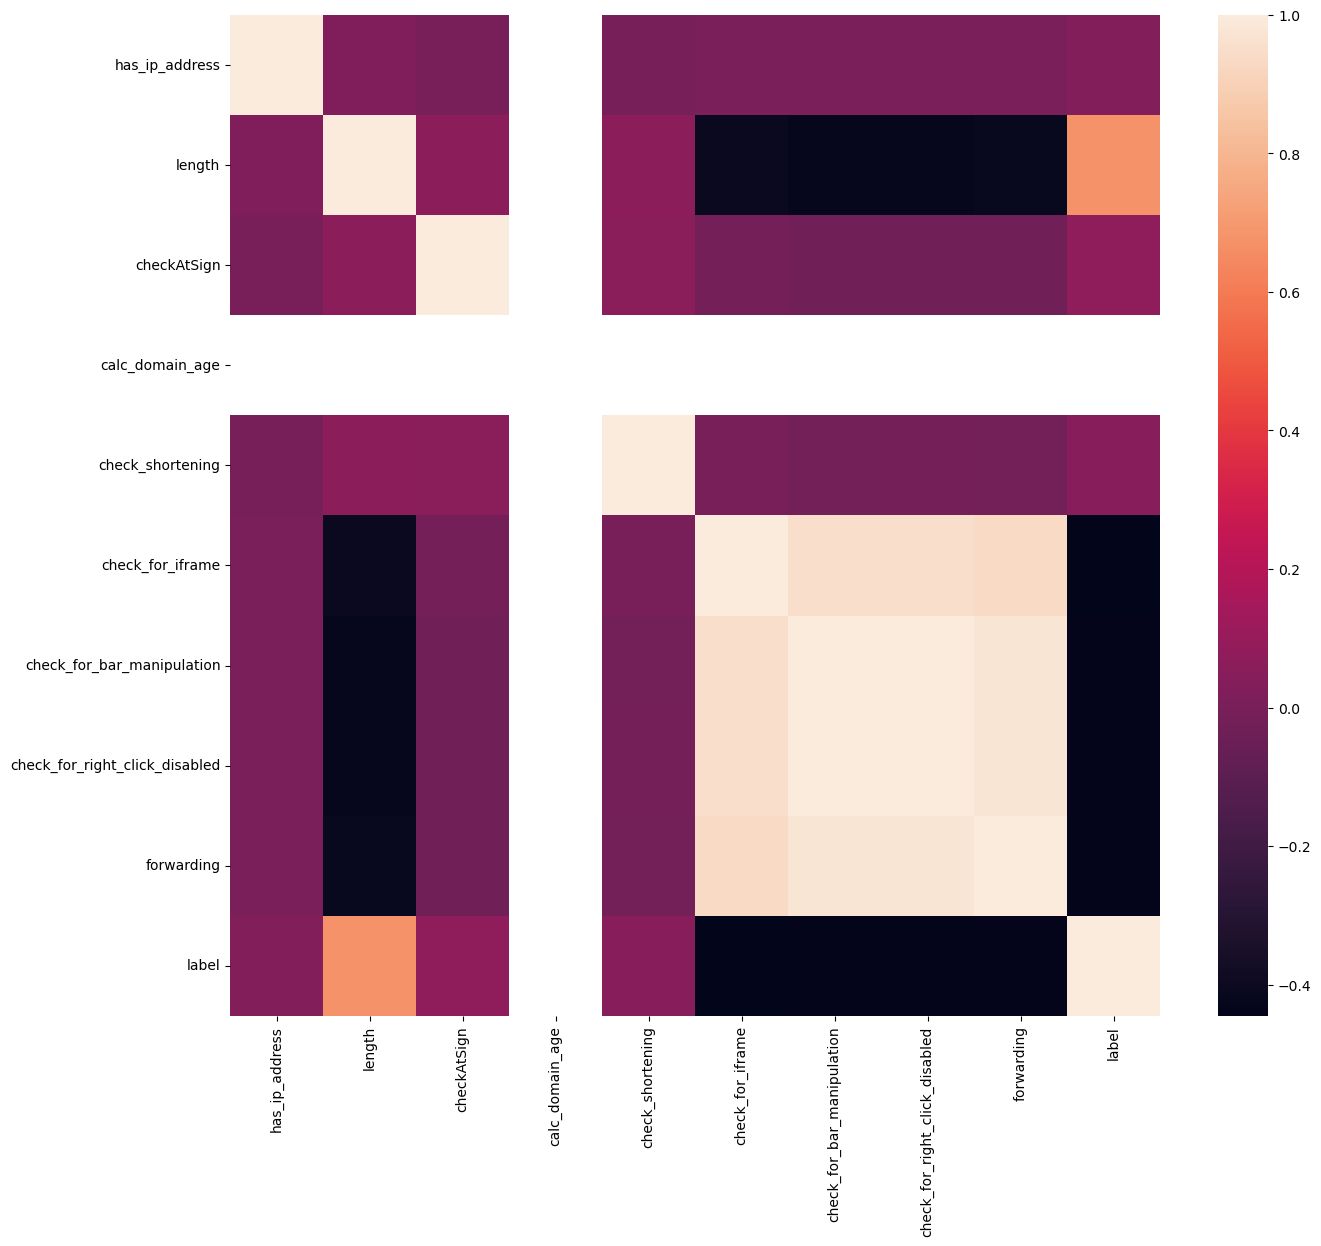

In [18]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [19]:
data0.describe()

,has_ip_address,length,checkAtSign,calc_domain_age,check_shortening,check_for_iframe,check_for_bar_manipulation,check_for_right_click_disabled,forwarding,label
count,4002.000000,4002.000000,4002.000000,4002.0,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000
mean,0.001000,0.680660,0.008996,0.0,0.087206,0.737881,0.719140,0.719390,0.729635,0.499750
std,0.031603,0.466279,0.094429,0.0,0.282173,0.439842,0.449475,0.449353,0.444204,0.500062
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data = data0.drop(['checkAtSign'], axis = 1).copy()
data = data.drop(['has_ip_address'], axis = 1).copy()
data = data.drop(['calc_domain_age'], axis = 1).copy()

In [23]:
data.describe()

,length,check_shortening,check_for_iframe,check_for_bar_manipulation,check_for_right_click_disabled,forwarding,label
count,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000,4002.000000
mean,0.680660,0.087206,0.737881,0.719140,0.719390,0.729635,0.499750
std,0.466279,0.282173,0.439842,0.449475,0.449353,0.444204,0.500062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


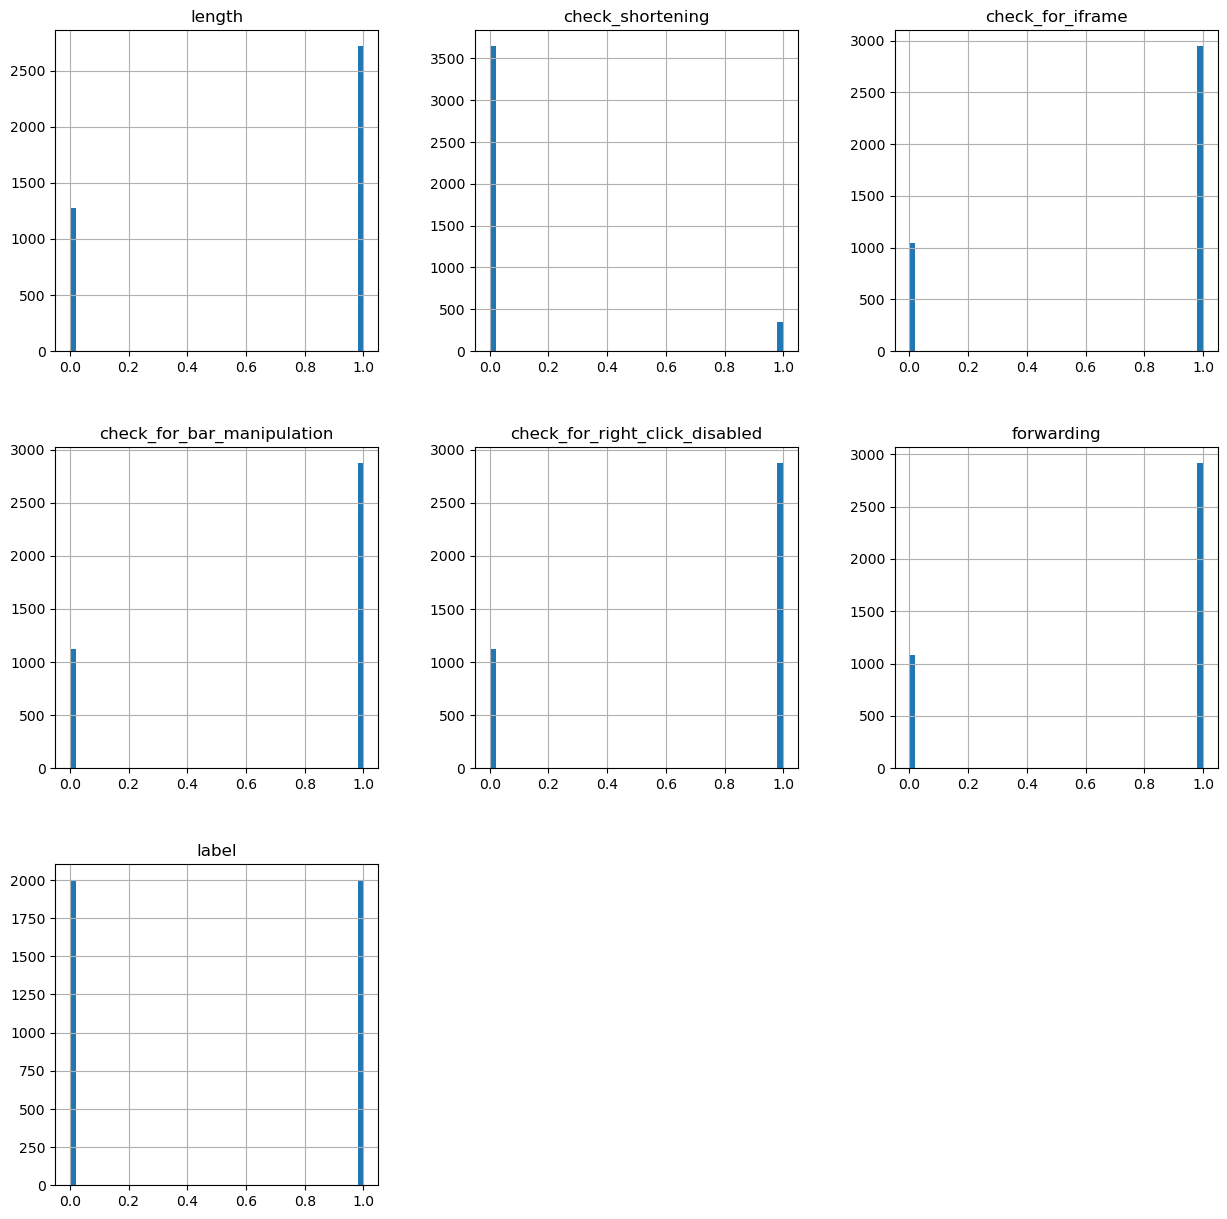

In [24]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

data.isnull().sum()

In [28]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,length,check_shortening,check_for_iframe,check_for_bar_manipulation,check_for_right_click_disabled,forwarding,label
0,0,0,1,1,1,1,0
1,1,1,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,1,1,1,1,0
4,1,0,0,0,0,0,1


Splitting the training data

In [33]:
y = data['label'] #dependent variable variable
X = data.drop('label',axis=1) #independent variables
X.shape, y.shape

((4002, 6), (4002,))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((3201, 6), (801, 6))

Machine Learning Models and Training

Types of machine learning problems: classification and regression
This dataset is a classification problem, input URL is classified as phishing(1) or legit(0). The supervised machine learning classification models that we will consider are:

-> Decision Tree-> 
Random Fores
-> 
Multilayer Perceptro
-> s
XGBo
-> st
Autoencoder Neural Net
-> ork
Support Vector Mac
hines

In [38]:
from sklearn.neighbors import KNeighborsClassifier 

In [53]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
y_pred = knn_model.predict(X_test)

In [55]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [56]:
y_test

263     0
1214    1
3835    1
1904    0
1990    0
       ..
3748    1
134     1
350     0
3477    0
714     0
Name: label, Length: 801, dtype: int64

In [57]:
print(classification_report(y_test, y_pred))
#precision = true positives/ true positives + tru negatives
#recall = true positives/ all positives

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       403
           1       0.84      0.54      0.65       398

    accuracy                           0.72       801
   macro avg       0.75      0.72      0.71       801
weighted avg       0.75      0.72      0.71       801



In [37]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

1. Decision Tress Classifier